# Time series regression

In this example, we are going to generate time series to illustrate how to perform a simulation-based analysis to determine the risk of false positives in regression.

Write a function which generates data as per an autoregressive process:

$X_t = \rho X_{t-1} + \epsilon_t,$

where $\epsilon_t \sim N(0, \sigma)$, $X_0=0$ and $t=1,...,T$.

Your function should take as arguments: $\rho$, $T$ and $\sigma$. Note that here we are assuming $0\leq\rho\leq 1$.

In [ ]:
import numpy as np
import scipy
import statsmodels.api as sm
from plotnine import *
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
def ar1(rho, T, sigma):
    X = [0]
    for t in range(1, T):
        X_t = np.random.normal(rho * X[t - 1], sigma, 1)[0]
        X.append(X_t)
    return X

Plot a few realisations of the process. What happens as you change $\rho$?

Low $\rho$: the process is mean-reverting.

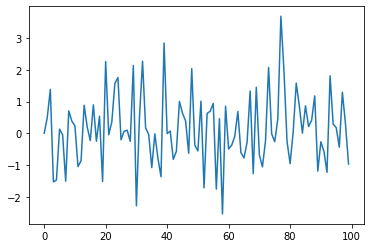

In [135]:
plt.plot(ar1(0, 100, 1))
plt.show()

$\rho=1$: the process is a random walk (which is a non-stationary process).

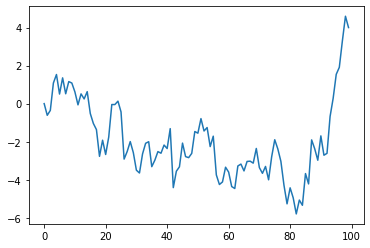

In [136]:
plt.plot(ar1(1, 100, 1))
plt.show()

Write a function which generates two (independent) ar1 processes, $\{X_t\}$ and $\{Y_t\}$ and performs a linear regression of one on the other:

$Y_t = \alpha + \beta X_t + \epsilon_t$

Let the function return both $\beta$ and the $p$-value associated with it.

In [152]:
def ar1_independent_regression(rho, T, sigma):
    X = ar1(rho, T, sigma)
    Y = ar1(rho, T, sigma)
    X = sm.add_constant(X, prepend=False)
    model = sm.OLS(Y, X)
    fit = model.fit()
    beta = fit.params[0]
    p = fit.pvalues[0]
    return beta, p

What value do you expect $\beta$ to be?

Answer: zero. The series are unrelated.

Suppose $\rho=0$. Carry out 1000 regressions where $T=100$ and $\sigma=0.5$ using your above function, in each case storing the values of $\beta$ and the $p$-values.

In [186]:
def regression_iterates(niter, rho, T, sigma):
    betas = []
    ps = []
    for i in range(niter):
        beta, p = ar1_independent_regression(rho, T, sigma)
        betas.append(beta)
        ps.append(p)
    return betas, ps

rho = 0.0
T = 100
sigma = 0.5
niter = 1000
betas, ps = regression_iterates(niter, rho, T, sigma)

What's the mean value of $\beta$ across all the iterates?

Answer: should be near zero.

In [187]:
np.mean(betas)

-0.0044585490894393015

What are proportion of cases do you reject the null hypothesis at the $5\%$ level?

Answer: should be near the 5% level.

In [188]:
np.mean(np.array(ps) < 0.05)

0.064

Now repeat the exercise but assuming $\rho=1$. What's the mean $\beta$ value now?

In [189]:
rho = 1
betas, ps = regression_iterates(niter, rho, T, sigma)

In [190]:
np.mean(betas)

-0.015132503968140462

Now, what are proportion of cases do you reject the null hypothesis at the $5\%$ level?

In [191]:
np.mean(np.array(ps) < 0.05)

0.749

From this, what do you conclude about the statistical test?

Answer: when $\rho$ is near 1, linearly regressing two independent AR1 processes and using the standard $t$ scores to assess their significance generates an over-abundance of false positives.

Bonus question: what do you conclude about conducting regression analyses of time series data?

That you need to be careful when conducting regression using time series data. Specifically, you need to ensure that either the data are what are known as stationary; or that you use a method that accounts for the risk of spurious regression: see this video for an intuitive explanation of the concept: https://www.youtube.com/watch?v=eozA46jWBck